In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


import pickle
import itertools

In [2]:
def plot_confusion_matrix(cm, classes,normalize=False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
data_df= pd.read_csv(r'E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Project Data/EEG_Data_Classified_Final_with_FA.csv')
data_df

,Gamma_TP10,Beta_TP10,Gamma_AF8,Gamma_TP9,Delta_TP9,Delta_AF8,Delta_TP10,Beta_TP9,Beta_AF8,Beta_AF7,Gamma_AF7,Theta_TP9,Theta_TP10,Theta_AF7,Delta_AF7,Alpha_TP10,Alpha_AF7,Class
0,0.148266,0.504698,-0.368988,-0.006402,0.751643,1.241092,0.434002,0.572833,0.248280,0.360754,-0.266985,0.432456,0.530501,0.364035,1.137732,1.130165,0.212564,2
1,0.148266,0.504698,-0.424164,-0.006402,0.751643,1.299211,0.434002,0.572833,0.295779,0.360754,-0.266985,0.432456,0.530501,0.364035,1.137732,1.130165,0.212564,2
2,0.148266,0.504698,-0.389931,-0.006402,0.751643,0.558158,0.434002,0.572833,0.315529,0.194026,-0.343758,0.432456,0.530501,0.287083,1.156090,1.130165,0.457129,2
3,0.367339,0.690641,-0.330480,0.246398,0.796775,0.994092,0.549118,0.566725,0.273616,0.265951,-0.295449,0.868472,0.769166,0.103581,0.867685,1.306648,0.426305,2
4,0.403797,0.639526,-0.291605,0.266886,0.775548,1.083485,0.519082,0.675240,0.373702,0.222702,-0.302929,0.784558,0.788158,0.210304,0.786956,1.377811,0.456308,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10966,1.286465,1.295115,0.437843,0.836466,0.986110,0.591422,0.967558,0.954669,0.442463,0.772369,0.777882,0.809593,0.818000,0.611749,0.480529,1.064631,0.749836,0
10967,1.283718,1.263483,0.355064,0.948936,0.905541,0.190887,0.845574,0.990603,0.342457,0.382008,0.159719,0.728109,0.762140,-0.141964,-0.027661,1.064631,0.157860,0
10968,1.266396,1.067333,0.265158,0.951014,0.927426,0.143809,0.309474,0.991058,0.388545,0.329413,0.137033,0.745079,0.503118,0.011965,0.148461,0.766170,0.349058,0
10969,1.202924,1.039346,0.232079,1.041569,0.859555,0.118321,0.143381,1.024632,0.441610,0.306938,0.166566,0.669280,0.404191,0.088193,0.190864,0.723669,0.328004,0


In [5]:
x= data_df.drop('Class',axis=1)
y= data_df['Class']

In [6]:
x

,Gamma_TP10,Beta_TP10,Gamma_AF8,Gamma_TP9,Delta_TP9,Delta_AF8,Delta_TP10,Beta_TP9,Beta_AF8,Beta_AF7,Gamma_AF7,Theta_TP9,Theta_TP10,Theta_AF7,Delta_AF7,Alpha_TP10,Alpha_AF7
0,0.148266,0.504698,-0.368988,-0.006402,0.751643,1.241092,0.434002,0.572833,0.248280,0.360754,-0.266985,0.432456,0.530501,0.364035,1.137732,1.130165,0.212564
1,0.148266,0.504698,-0.424164,-0.006402,0.751643,1.299211,0.434002,0.572833,0.295779,0.360754,-0.266985,0.432456,0.530501,0.364035,1.137732,1.130165,0.212564
2,0.148266,0.504698,-0.389931,-0.006402,0.751643,0.558158,0.434002,0.572833,0.315529,0.194026,-0.343758,0.432456,0.530501,0.287083,1.156090,1.130165,0.457129
3,0.367339,0.690641,-0.330480,0.246398,0.796775,0.994092,0.549118,0.566725,0.273616,0.265951,-0.295449,0.868472,0.769166,0.103581,0.867685,1.306648,0.426305
4,0.403797,0.639526,-0.291605,0.266886,0.775548,1.083485,0.519082,0.675240,0.373702,0.222702,-0.302929,0.784558,0.788158,0.210304,0.786956,1.377811,0.456308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10966,1.286465,1.295115,0.437843,0.836466,0.986110,0.591422,0.967558,0.954669,0.442463,0.772369,0.777882,0.809593,0.818000,0.611749,0.480529,1.064631,0.749836
10967,1.283718,1.263483,0.355064,0.948936,0.905541,0.190887,0.845574,0.990603,0.342457,0.382008,0.159719,0.728109,0.762140,-0.141964,-0.027661,1.064631,0.157860
10968,1.266396,1.067333,0.265158,0.951014,0.927426,0.143809,0.309474,0.991058,0.388545,0.329413,0.137033,0.745079,0.503118,0.011965,0.148461,0.766170,0.349058
10969,1.202924,1.039346,0.232079,1.041569,0.859555,0.118321,0.143381,1.024632,0.441610,0.306938,0.166566,0.669280,0.404191,0.088193,0.190864,0.723669,0.328004


In [7]:
y

0        2
1        2
2        2
3        2
4        2
        ..
10966    0
10967    0
10968    0
10969    0
10970    0
Name: Class, Length: 10971, dtype: int64

### Normalizing Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases.

In [8]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_minmax = MinMaxScaler.fit_transform(x)

In [ ]:
#X= preprocessing.StandardScaler().fit(x).transform(x.astype(float))
#X[0:5]

In [9]:
#Train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (7679, 17) (7679,)
Test set: (3292, 17) (3292,)


### KNN Model

In [10]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
 # The predicted output values
y_pred_knn = knn_model.predict(x_test)
y_pred_knn

array([1, 0, 2, ..., 0, 2, 1], dtype=int64)

In [13]:
result = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred_knn)
print("Classification Report:" ,)
print (result1)

result2 = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", result2)

Confusion Matrix:
[[1112   25   40]
 [  46  765  139]
 [  38  154  973]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1177
           1       0.81      0.81      0.81       950
           2       0.84      0.84      0.84      1165

    accuracy                           0.87      3292
   macro avg       0.86      0.86      0.86      3292
weighted avg       0.87      0.87      0.87      3292

Accuracy: 0.8657351154313487


[[1112   25   40]
 [  46  765  139]
 [  38  154  973]]


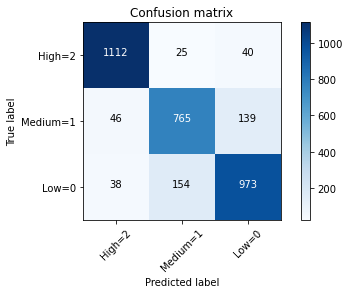

In [14]:
 # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(result, classes=['High=2', 'Medium=1', 'Low=0'], normalize= False,  title='Confusion matrix')

In [15]:
from sklearn import metrics

# accuracy comparison for different K select
k_select= 10
mean_acc= np.zeros((k_select-1))
std_acc= np.zeros((k_select-1))
confusionMx= []

for n in range(1,k_select):
    knn_model= KNeighborsClassifier(n_neighbors= n).fit(x_train,y_train)
    y_pred= knn_model.predict(x_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test,y_pred)
    
    std_acc[n-1]= np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
mean_acc

array([0.92041312, 0.88244228, 0.88517618, 0.86360875, 0.86573512,
       0.85328068, 0.85722965, 0.85024301, 0.84781288])

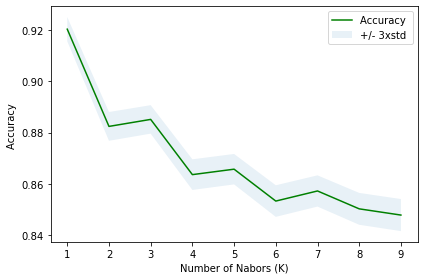

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,k_select),mean_acc,'g')
plt.fill_between(range(1,k_select),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [17]:
jaccard_score(y_test, y_pred_knn, average='macro') 

0.761129643772144

In [18]:
f1_score(y_test, y_pred_knn, average='macro') 

0.8616345287895925

In [19]:
recall_score(y_test, y_pred_knn, average=None) 

array([0.94477485, 0.80526316, 0.83519313])

In [20]:
precision_score(y_test, y_pred_knn, average=None) 

array([0.92976589, 0.81038136, 0.84461806])

In [21]:
pickle.dump(knn_model, open("E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/knn_attention_model.pkl","wb")) 

### Gaussian Naive Bayes classifier

In [22]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

y_pred_gnb = gnb_model.predict(x_test)
y_pred_gnb

array([1, 1, 2, ..., 0, 2, 1], dtype=int64)

In [23]:
result = confusion_matrix(y_test, y_pred_gnb)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred_gnb)
print("Classification Report:" ,)
print (result1)

result2 = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", result2)

Confusion Matrix:
[[809 252 116]
 [ 37 753 160]
 [129 514 522]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1177
           1       0.50      0.79      0.61       950
           2       0.65      0.45      0.53      1165

    accuracy                           0.63      3292
   macro avg       0.66      0.64      0.63      3292
weighted avg       0.67      0.63      0.63      3292

Accuracy: 0.6330498177399757


[[809 252 116]
 [ 37 753 160]
 [129 514 522]]


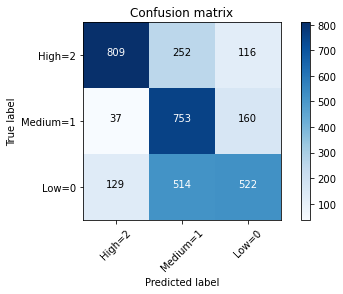

In [24]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(result, classes=['High=2', 'Medium=1', 'Low=0'], normalize= False,  title='Confusion matrix')

In [26]:
jaccard_score(y_test, y_pred_gnb, average='macro') 

0.4678141175458335

In [27]:
f1_score(y_test, y_pred_gnb, average='macro') 

0.6312204353199554

In [28]:
recall_score(y_test, y_pred_gnb, average=None) 

array([0.6873407 , 0.79263158, 0.44806867])

In [29]:
precision_score(y_test, y_pred_gnb, average=None) 

array([0.82974359, 0.49572087, 0.65413534])

In [30]:
pickle.dump(gnb_model, open("E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/gnb_attention_model.pkl","wb")) 

In [31]:
#model= pickle.load(open('E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/gnb_attention_model.pkl','rb')) 

### Logistic Regression

Here I am using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [32]:
logreg_model = LogisticRegression(solver='lbfgs', multi_class='auto')
logreg_model.fit(x_train, y_train)

y_pred_logreg = logreg_model.predict(x_test)
y_pred_logreg

array([1, 0, 2, ..., 0, 2, 2], dtype=int64)

In [33]:
y_pred_logreg_prob = logreg_model.predict_proba(x_test)
y_pred_logreg_prob

array([[0.0762378 , 0.73095607, 0.19280613],
       [0.52894773, 0.18729896, 0.28375331],
       [0.04935644, 0.2879649 , 0.66267866],
       ...,
       [0.87937058, 0.0087112 , 0.11191822],
       [0.02203609, 0.04583312, 0.93213079],
       [0.05366931, 0.34715095, 0.59917974]])

In [34]:
result = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred_logreg)
print("Classification Report:" ,)
print (result1)

result2 = accuracy_score(y_test, y_pred_logreg)
print("Accuracy:", result2)

Confusion Matrix:
[[1011   67   99]
 [  90  617  243]
 [ 110  232  823]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1177
           1       0.67      0.65      0.66       950
           2       0.71      0.71      0.71      1165

    accuracy                           0.74      3292
   macro avg       0.74      0.74      0.74      3292
weighted avg       0.74      0.74      0.74      3292

Accuracy: 0.7445321992709599


[[1011   67   99]
 [  90  617  243]
 [ 110  232  823]]


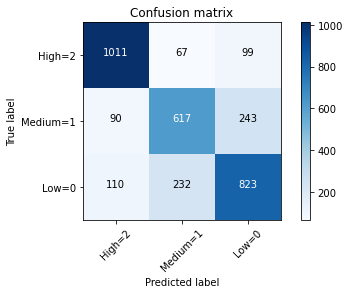

In [35]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(result, classes=['High=2', 'Medium=1', 'Low=0'], normalize= False,  title='Confusion matrix')

In [36]:
jaccard_score(y_test, y_pred_logreg, average='macro') 

0.5914393682154764

In [37]:
f1_score(y_test, y_pred_logreg, average='macro') 

0.7381596821475721

In [38]:
recall_score(y_test, y_pred_logreg, average=None) 

array([0.85896347, 0.64947368, 0.70643777])

In [39]:
precision_score(y_test, y_pred_logreg, average=None) 

array([0.83484723, 0.67358079, 0.70643777])

In [40]:
pickle.dump(logreg_model, open("E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/logreg_attention_model.pkl","wb")) 

In [41]:
#model= pickle.load(open('E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/logreg_attention_model.pkl','rb'))  

### C-support Vector Classification 

The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function)

In [46]:
csvc_model = SVC(C=50, kernel='rbf', gamma=1) 
csvc_model.fit(x_train,y_train)

y_pred_svc = csvc_model.predict(x_test)
y_pred_svc[0:5]

array([1, 0, 2, 0, 2], dtype=int64)

In [47]:
result = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred_svc)
print("Classification Report:" ,)
print (result1)

result2 = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", result2)

Confusion Matrix:
[[1152    7   18]
 [  29  820  101]
 [  34   84 1047]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1177
           1       0.90      0.86      0.88       950
           2       0.90      0.90      0.90      1165

    accuracy                           0.92      3292
   macro avg       0.92      0.91      0.91      3292
weighted avg       0.92      0.92      0.92      3292

Accuracy: 0.9170716889428918


[[1152    7   18]
 [  29  820  101]
 [  34   84 1047]]


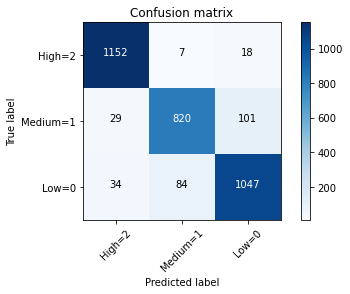

In [48]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(result, classes=['High=2', 'Medium=1', 'Low=0'], normalize= False,  title='Confusion matrix')

In [49]:
f1_score(y_test, y_pred_svc, average='macro') 

0.9142614140861928

In [50]:
recall_score(y_test, y_pred_svc, average=None) 

array([0.97875956, 0.86315789, 0.89871245])

In [51]:
precision_score(y_test, y_pred_svc, average=None) 

array([0.94814815, 0.90010977, 0.89794168])

Compare diffetent kernal of Liner, Sigmoid, and Polynomial

In [53]:
# change  kernal funtion and compair accuracy
svc_model_2 = SVC(kernel='linear')

svc_model_2.fit(x_train, y_train)
y_predict_2 = svc_model_2.predict(x_test)

print("Avg F1-score of svm kernal funtion Liner model: %.4f" % f1_score(y_test, y_predict_2, average='macro'))
print("Jaccard score'of svm kernal funtion Liner model:: %.4f" % jaccard_score(y_test, y_predict_2, average='macro'))

Avg F1-score of svm kernal funtion Liner model: 0.7455
Jaccard score'of svm kernal funtion Liner model:: 0.6008


In [54]:
# change  kernal funtion and compair accuracy
svc_model_3 = SVC(kernel='sigmoid') 

svc_model_3.fit(x_train, y_train) 
y_predict_3 = svc_model_3.predict(x_test)

print("Avg F1-score of svm kernal funtion Sigmoid model: %.4f" % f1_score(y_test, y_predict_3, average='macro'))
print("Jaccard score'of svm kernal funtion Sigmoid model:: %.4f" % jaccard_score(y_test, y_predict_3, average='macro'))

Avg F1-score of svm kernal funtion Sigmoid model: 0.3139
Jaccard score'of svm kernal funtion Sigmoid model:: 0.1962


In [55]:
# change  kernal funtion and compair accuracy
svc_model_4 = SVC(kernel='poly', degree=2)

svc_model_4.fit(x_train, y_train) 
y_predict_4 = svc_model_4.predict(x_test)

print("Avg F1-score of svm kernal funtion Polynomial model: %.4f" % f1_score(y_test, y_predict_4, average='macro'))
print("Jaccard score'of svm kernal funtion Polynomial model:: %.4f" % jaccard_score(y_test, y_predict_4, average='macro'))

Avg F1-score of svm kernal funtion Polynomial model: 0.7902
Jaccard score'of svm kernal funtion Polynomial model:: 0.6591


In [56]:
pickle.dump(csvc_model, open("E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/svc_model_attention_model.pkl","wb"))  

In [57]:
#model= pickle.load(open('E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/svc_model_attention_model.pkl','rb'))  

### Random Forest Model

In [58]:
Rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, criterion = 'entropy', random_state=0)
Rf_model.fit(x_train, y_train)

y_predict_Rf = Rf_model.predict(x_test)
y_predict_Rf[0:5]

array([1, 0, 2, 0, 0], dtype=int64)

In [59]:
result = confusion_matrix(y_test, y_predict_Rf)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_predict_Rf)
print("Classification Report:" ,)
print (result1)

result2 = accuracy_score(y_test, y_predict_Rf)
print("Accuracy:", result2)

Confusion Matrix:
[[975  86 116]
 [149 468 333]
 [207 176 782]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1177
           1       0.64      0.49      0.56       950
           2       0.64      0.67      0.65      1165

    accuracy                           0.68      3292
   macro avg       0.67      0.66      0.66      3292
weighted avg       0.67      0.68      0.67      3292

Accuracy: 0.6758809234507898


[[975  86 116]
 [149 468 333]
 [207 176 782]]


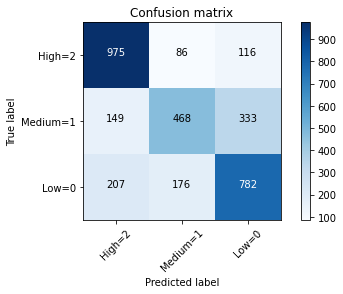

In [60]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(result, classes=['High=2', 'Medium=1', 'Low=0'], normalize= False,  title='Confusion matrix')

In [61]:
f1_score(y_test, y_predict_Rf, average='macro')  

0.6624698032834401

In [62]:
jaccard_score(y_test, y_predict_Rf, average='macro') 

0.5022189914959021

In [ ]:
recall_score(y_test, y_predict_Rf, average=None) 

In [ ]:
precision_score(y_test, y_predict_Rf, average=None) 

In [63]:
pickle.dump(Rf_model, open("E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/Rf_attention_model.pkl","wb")) 

In [64]:
#model= pickle.load(open('E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/Rf_attention_model.pkl','rb')) 

### Decision tree classifier

In [65]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)
y_pred_dt

array([1, 0, 2, ..., 0, 2, 2], dtype=int64)

In [66]:
result = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred_dt)
print("Classification Report:" ,)
print (result1)

result2 = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", result2)

Confusion Matrix:
[[1063   47   67]
 [  84  666  200]
 [  82  205  878]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1177
           1       0.73      0.70      0.71       950
           2       0.77      0.75      0.76      1165

    accuracy                           0.79      3292
   macro avg       0.79      0.79      0.79      3292
weighted avg       0.79      0.79      0.79      3292

Accuracy: 0.7919198055893074


[[1063   47   67]
 [  84  666  200]
 [  82  205  878]]


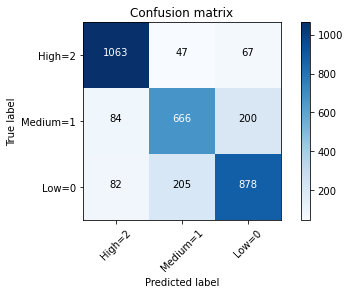

In [67]:
 # Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(result, classes=['High=2', 'Medium=1', 'Low=0'], normalize= False,  title='Confusion matrix')

In [68]:
jaccard_score(y_test, y_pred_dt, average='macro') 

0.6529055240156668

In [69]:
f1_score(y_test, y_pred_dt, average='macro') 

0.7856198437753118

In [70]:
recall_score(y_test, y_pred_dt, average=None) 

array([0.90314359, 0.70105263, 0.75364807])

In [71]:
precision_score(y_test, y_pred_dt, average=None) 

array([0.86493084, 0.7254902 , 0.76681223])

In [72]:
pickle.dump(dt_model, open("E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/DT_attention_model.pkl","wb")) 

In [73]:
#model= pickle.load(open('E:/NeuroNerds-AdEvaluator/NeuroNerds-AdEvaluator/Praject Codes/Models/DT_attention_model.pkl','rb')) 